In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import math

In [10]:
df = pd.read_csv('merge_diag_pat_proc_icu_cpt_ser.csv')
#df['RELIGION'].unique()



In [11]:
# Drop unused or no longer needed columns
df.drop(columns=['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'ADMISSION_LOCATION',
                'DISCHARGE_LOCATION', 'LANGUAGE', 'MIN_ADMIT', 'DOB',
                'DIAGNOSIS',  'DEATHTIME'], inplace=True)
#df['age'].astype('int')
#df[df['age']>=15]


In [12]:
# Create dummy columns for categorical variables
prefix_cols = ['ADM', 'INS', 'REL', 'ETH', 'AGE', 'MAR']
dummy_cols = ['ADMISSION_TYPE', 'INSURANCE', 'RELIGION',
             'ETHNICITY', 'age', 'MARITAL_STATUS']
df = pd.get_dummies(df, prefix=prefix_cols, columns=dummy_cols)


In [13]:
df['ICU_LOS'].fillna(value=0, inplace=True)
#df['no_CPT'].fillna(value=0, inplace=True)
df['Evaluation and management'].fillna(value=0, inplace=True)
df['Surgery'].fillna(value=0, inplace=True)
df['Radiology'].fillna(value=0, inplace=True)
df['Anesthesia'].fillna(value=0, inplace=True)
df['Emerging technology'].fillna(value=0, inplace=True)
df['Pathology and laboratory'].fillna(value=0, inplace=True)
df['Medicine'].fillna(value=0, inplace=True)
df['ICU'].fillna(value=0, inplace=True)
df['NICU'].fillna(value=0, inplace=True)

df['LOS']= round(df['LOS'])

df.columns


#df_features= df.drop(df['LOS'], inplace=True, axis=1)
#1. separate features dataframe and target dataframe (LOS).
#2. create a new dataframe with the target value being in binary (if LOS>5 then 1, if LOS<5 then 0)

Index(['LOS', 'd_blood', 'd_circulatory', 'd_congenital', 'd_digestive',
       'd_endocrine', 'd_genitourinary', 'd_ill-defined', 'd_infectious',
       'd_injury', 'd_mental', 'd_muscular', 'd_neoplasms', 'd_nervous',
       'd_pregnancy', 'd_prenatal', 'd_respiratory', 'd_skin', 'GENDER',
       'p_cardiovascular', 'p_digestive', 'p_ear', 'p_endocrine', 'p_eye',
       'p_genital', 'p_hemic & lymphatic', 'p_integumentary', 'p_misc',
       'p_musculoskeletal', 'p_nervous', 'p_nose & mouth', 'p_obstetrical',
       'p_respiratory', 'p_urinary', 'ICU', 'NICU', 'ICU_LOS', 'Anesthesia',
       'Emerging technology', 'Evaluation and management', 'Medicine',
       'Pathology and laboratory', 'Radiology', 'Surgery', 'CMED', 'CSURG',
       'DENT', 'ENT', 'GU', 'GYN', 'MED', 'NB', 'NBB', 'NMED', 'NSURG', 'OBS',
       'OMED', 'ORTHO', 'PSURG', 'PSYCH', 'SURG', 'TRAUM', 'TSURG', 'VSURG',
       'ADM_ELECTIVE', 'ADM_EMERGENCY', 'ADM_NEWBORN', 'ADM_URGENT',
       'INS_Government', 'INS_Medic

In [14]:
df = df.dropna(how='any',axis=0) 


In [15]:
df = df.reset_index()
df['LOS'].nunique()

154

In [16]:
df.to_csv('merge_final.csv',index=False)
df.isnull().values.sum()

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46786 entries, 0 to 46785
Data columns (total 93 columns):
index                         46786 non-null int64
LOS                           46786 non-null float64
d_blood                       46786 non-null float64
d_circulatory                 46786 non-null float64
d_congenital                  46786 non-null float64
d_digestive                   46786 non-null float64
d_endocrine                   46786 non-null float64
d_genitourinary               46786 non-null float64
d_ill-defined                 46786 non-null float64
d_infectious                  46786 non-null float64
d_injury                      46786 non-null float64
d_mental                      46786 non-null float64
d_muscular                    46786 non-null float64
d_neoplasms                   46786 non-null float64
d_nervous                     46786 non-null float64
d_pregnancy                   46786 non-null float64
d_prenatal                    46786 non-null 

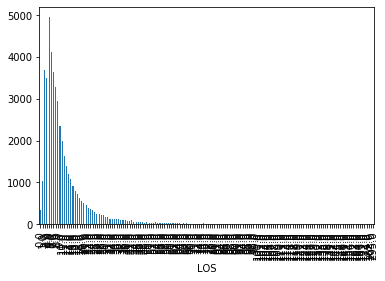

In [32]:
df.groupby(['LOS']).size().plot.bar()
df.info()


In [33]:
#df[df.columns].corr()
#df_corr = df_corr[df_corr>=0.1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46786 entries, 0 to 46785
Data columns (total 93 columns):
index                         46786 non-null int64
LOS                           46786 non-null float64
d_blood                       46786 non-null float64
d_circulatory                 46786 non-null float64
d_congenital                  46786 non-null float64
d_digestive                   46786 non-null float64
d_endocrine                   46786 non-null float64
d_genitourinary               46786 non-null float64
d_ill-defined                 46786 non-null float64
d_infectious                  46786 non-null float64
d_injury                      46786 non-null float64
d_mental                      46786 non-null float64
d_muscular                    46786 non-null float64
d_neoplasms                   46786 non-null float64
d_nervous                     46786 non-null float64
d_pregnancy                   46786 non-null float64
d_prenatal                    46786 non-null 

C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 34 ICU_LOS (0.238787)
2. feature 37 Evaluation and management (0.195825)
3. feature 38 Medicine (0.069184)
4. feature 14 prenatal (0.050064)
5. feature 95 AGE_Infants (0.044032)
6. feature 26 misc_y (0.043629)
7. feature 43 CSURG (0.041012)
8. feature 49 NB (0.032629)
9. feature 18 cardiovascular (0.031560)
10. feature 15 respiratory_x (0.029493)
11. feature 64 ADM_NEWBORN (0.028632)
12. feature 104 MAR_UNKNOWN (DEFAULT) (0.020655)
13. feature 33 no_INTENSIVE_CARE (0.019655)
14. feature 63 ADM_EMERGENCY (0.016163)
15. feature 1 circulatory (0.015780)
16. feature 5 genitourinary (0.013914)
17. feature 19 digestive_y (0.011977)
18. feature 31 respiratory_y (0.011760)
19. feature 28 nervous_y (0.010684)
20. feature 62 ADM_ELECTIVE (0.009890)
21. feature 68 INS_Medicare (0.009074)
22. feature 7 injury (0.007965)
23. feature 48 MED (0.005621)
24. feature 41 Surgery (0.005319)
25. feature 3 digestive_x (0.005092)
26. feature 9 misc_x (0.004986)
27. feature 6 infec

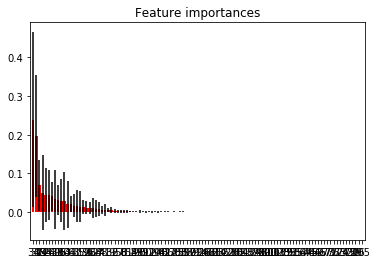

In [8]:
#df.groupby(['TARGET']).size().plot.bar()
y = df['LOS']
X = df.loc[:, df.columns != 'LOS']
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [9]:
#for i in range(len())
df_corr=df[df.columns[1:]].corr()['genitourinary']
df_corr[df_corr>=0.5]

genitourinary    1.0
Name: genitourinary, dtype: float64

In [10]:
df[df.columns].corr()

,LOS,blood,circulatory,congenital,digestive_x,endocrine_x,genitourinary,infectious,injury,mental,...,AGE_Teens,AGE_middle_adult,AGE_senior,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
LOS,1.000000,0.106822,0.005024,0.167382,0.155653,0.050076,0.121843,0.225670,0.117057,0.009696,...,-0.007638,0.006689,-0.036856,0.003797,-0.003358,-0.034644,0.004568,0.009571,0.044780,-0.018182
blood,0.106822,1.000000,0.156238,-0.060902,0.278068,0.266588,0.283784,0.254475,0.119256,0.131647,...,0.011315,0.067988,0.122344,0.035163,0.003808,0.056233,0.021054,0.076908,-0.231007,0.068015
circulatory,0.005024,0.156238,1.000000,-0.102777,0.048123,0.354264,0.285350,0.046175,-0.006418,-0.002106,...,-0.180208,-0.104505,0.507606,0.041412,0.002240,0.227630,0.004470,-0.064713,-0.405548,0.203312
congenital,0.167382,-0.060902,-0.102777,1.000000,-0.051855,-0.101937,-0.069510,-0.050640,-0.010192,-0.055779,...,-0.015240,-0.023745,-0.152239,-0.026746,-0.003701,-0.084380,-0.009238,-0.030435,0.201300,-0.057318
digestive_x,0.155653,0.278068,0.048123,-0.051855,1.000000,0.220879,0.173141,0.235333,0.039904,0.148885,...,-0.031096,0.097327,0.104180,0.048097,0.009539,0.059045,0.021497,0.068964,-0.218186,0.048263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAR_MARRIED,-0.034644,0.056233,0.227630,-0.084380,0.059045,0.120670,0.068162,-0.006648,-0.076191,-0.085275,...,-0.117528,0.067187,0.273444,-0.202692,-0.014204,1.000000,-0.081486,-0.442345,-0.410252,-0.300050
MAR_SEPARATED,0.004568,0.021054,0.004470,-0.009238,0.021497,0.024632,0.028796,0.027322,-0.010634,0.039654,...,-0.001295,0.052662,-0.012045,-0.023295,-0.001632,-0.081486,1.000000,-0.050838,-0.047150,-0.034484
MAR_SINGLE,0.009571,0.076908,-0.064713,-0.030435,0.068964,0.065237,0.042991,0.117552,0.029299,0.217643,...,0.305959,0.173656,-0.163246,-0.126457,-0.008862,-0.442345,-0.050838,1.000000,-0.255952,-0.187197
MAR_UNKNOWN (DEFAULT),0.044780,-0.231007,-0.405548,0.201300,-0.218186,-0.346330,-0.245548,-0.175178,0.084066,-0.159301,...,-0.072808,-0.199673,-0.421095,-0.117282,-0.008219,-0.410252,-0.047150,-0.255952,1.000000,-0.173616
